# Task2 Week 1 Bank Consumer Churning Model

# 1-Load preprocessed data

In [12]:
import pandas as pd                 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# read data from csv file
dataset=pd.read_csv('churn.csv') 

# encode categorical data
encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

# dropping irrelevant features columns (using pandas drop()): rownumber, customerId, and surname
dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

# 2- Divide the whole dataset into training data and test data

In [13]:
X = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [14]:
#Divide the whole dataset into training data and test data

from sklearn.model_selection import KFold 
k = 10   # 10 folds
kf = KFold(n_splits = k, random_state = None) # Define the split - into 10 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [15]:
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score)
import seaborn as sns
import numpy as np

# Model: Logistic regression

Accuracy: 80.20%


<AxesSubplot:>

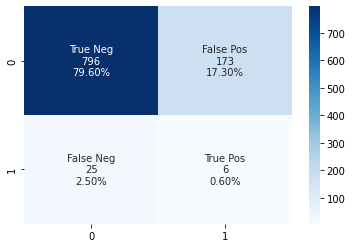

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()     # L2 regularization is applied by default
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')